In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Functions
What exactly are functions? Functions are things we use in math to change one number <font color='blue'>x</font> into another number <font color='red'>y</font> through a series of operations (addition, subtraction, multiplication, etc.).
<br> E.g. If we want to change 2 (<font color='blue'>x</font>) to be 4 (<font color='red'>y</font>), we can multiply 2 by 2 to get 4. 
<br> Therefore the function is <font color='red'>y</font> $= 2$ $\times$ <font color='blue'>x</font> or <font color='red'>y</font> $= 2$<font color='blue'>x</font>. <br>We can code this function in Python as the following:

In [2]:
# y = 2x

def times_two(x):
    print("Multiplying {0} by 2".format(x))
    y = x * 2
    return y

# y = 0.5x

# y = x

# y = 2x + 1

# y = 4.5x + 3.5

# y = (x/2) + 0.5

## Things to explore:
<b>Feel free to add any additional cells as you want to experiement and tackle these exercise</b>
1. Check that the above <code>times_two</code> function does multiply x by 2, by running a couple of numbers through the function.
    - Could you change the <code>times_two</code> function so that it implements the following functions (add the functions in the cell above):
        - $y = 0.5x$
        - $y = x$
        - $y = 2x + 1$
        - $y = 4.5x + 3.5$
        - $y = (x/2) + 0.5$
2. In the cell below, there is a list of numbers called <code>Xs</code>, how could we use our function (which processes individual numbers [which we call scalars]) to change all of the numbers in the list to make a list of new numbers: <code>Y_preds</code>? (There are 2 ways of doing this) 
3. What is the difference between <code>print</code> and <code>return</code>? When would be a good idea to use them in functions? Make your notes in the cell below:

#### Make your notes here:



In [3]:
# Exercise 1: Test that the above function does multiply x by 2 by running different values through the function.
# This cell should help you with Exercise 3
Y_pred = times_two(2)
Y_pred

Multiplying 2 by 2


4

In [22]:
# Exercise 2: Run these values through the function above to get a list of new values, Y_preds
Xs = [2,3,6,3.4,9.2,0.2]
Ys = [4,6,12,6.8,18.4,0.4]
# For later on in the session.
Y_preds = []

# Plotting data and functions

We can Python's <code>matplotlib.pyplot</code> sub-module to plot our data (<code>Xs</code> and <code>Ys</code>) as a scatter plot, from this we can see the relationship between X and Y and find a function (line of best fit), which fits the data well.
The below functions are helper functions which help you plot the data <code>plot_xy</code> and a line <code>best_fit_line</code> over the data.

In [17]:
# PLOTTING FUNCTIONS: Feel free to manipulate and play abotu with these AFTER the session.

def best_fit_line(coef, intercept, xs):
    """
    This function plots a line on the plot created by plot_xy.
    Use this function to check if predicted line fits the data well.
    PARAMETERS:
    - coef: [integer or float] coefficient of the line (ß in y = ßx + c)
    - intercept: [integer or float] intercept of the line (c in y = ßx + c)
    - xs: [numpy array] of xs involved in plot_xy function
    """
    X = np.linspace(np.min(xs)-10, np.max(xs)+10, 10)
    Y = (coef * X) + intercept
    return X, Y

def plot_xy(xs,ys, fit = False, fit_coef = 0, fit_intercept = 0, title = None):
    """
    This function plots both x and y lists / vectors, as well as your predicted best fit line.
    - xs: [list or numpy array] of X values.
    - ys: [list or numpy array] of Y values.
    - fit: [boolean] add your best fit line in plot?
    - fit_coef: [integer or float] best fit line coefficient (see best_fit_line).
    - fit_intercept: [integer or float] best fit line intercept (see best_fit_line).
    - title: [string] title of the plot.
    """
    plt.figure(figsize = (12,6))
    plt.xlabel("x")
    plt.ylabel("y")
    try:
        plt.scatter(xs, ys, label = "Data: y = f(x)", color = "green")
        if fit:
            line_x, line_y = best_fit_line(fit_coef, fit_intercept, xs)
            plt.plot(line_x, line_y, label = "Line: ŷ = f(x) = {0}x + {1}".format(fit_coef, fit_intercept), color = "red")
    except:
        plt.scatter(np.array(xs), np.array(ys), label = "Data: y = f(x)", color = "green")
        if fit:
            line_x, line_y = best_fit_line(fit_coef, fit_intercept, np.array(xs))
            plt.plot(line_x, line_y, label = "Line: ŷ = f(x) = {0}x + {1}".format(fit_coef, fit_intercept), color = "red")
    plt.legend()
   
    plt.title(title)

In [18]:
# plot the data (Xs and Ys) using the helper functions above with fit = True, fit_coef = 2, fit_intercept = 0, title = "LINE A"
# plot_xy(xs,ys, fit = True, fit_coef = 2, fit_intercept = 0, title = "LINE A")
## LINE A


## Things to explore

From LINE A, we can predict y when $x = 10.356$ or $x = -2.39$ even though we have not seen those values in our data by simply plugging in x into the function of the line. Therefore, we say that we predict y (ŷ / y hat / y pred[iction]) from x. 
Now we have a y and ŷ, what is the difference? y is the actual value which corresponds to it's specific x value (e.g. when x = 2, y should equal 4.) ŷ is the prediction of y using the function of the line of best fit. E.g. in the function $ŷ = 2x$, we get ŷ to be equal to 4. 
We can see though that when $x = 2$ in lines B and C, ŷ does not equal y.

1. Run the cell below, what is the difference between LINE A, LINE B and LINE C?
    - Which line fits the data the best? Why? 
2. Is there a way we can quantify the "goodness of fit" (we call this the error / loss/ cost function)? Try writing a function which does this! <br> HINT: you will need to compare the predicted values from the function of the line (ŷ) and the actual predictor values (Y). <br> Feel free to discuss potential solutions with people next to you.
3. If we add the data points (x = 5, y = 17 and x = 9.7, y = 22), would LINE A still predict y accurately, given these new "unseen" data points? Why? P


Multiplying [2.  3.  6.  3.4 9.2 0.2] by 2
Multiplying [2.  3.  6.  3.4 9.2 0.2] by 2


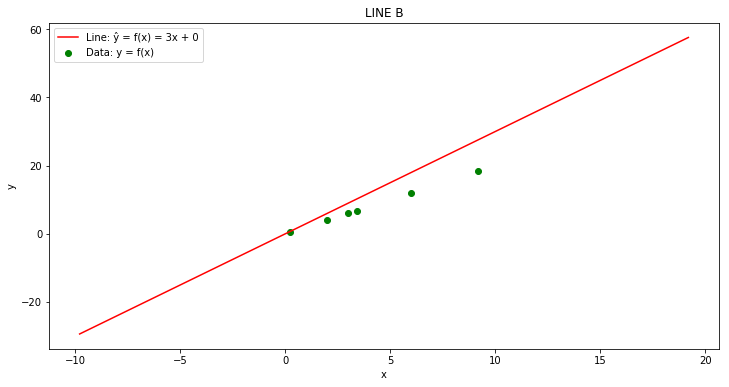

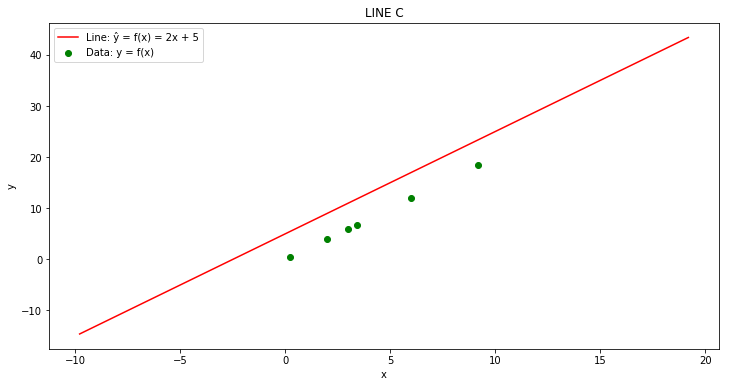

In [20]:
# LINE B
ax1 = plot_xy(Xs,times_two(np.array(Xs)), fit = True, fit_coef = 3, fit_intercept = 0, title = "LINE B")
# LINE C
ax2 = plot_xy(Xs,times_two(np.array(Xs)), fit = True, fit_coef = 2, fit_intercept = 5, title = "LINE C")

In [ ]:
## Exercise 2: Try and write a cost function using the parameters y and y_hat
def cost(y, y_hat):
    """
    Function to quantify goodness of fit between the data (X and Y) and the predictions (ŷ = f(X))
    PARAMETERS
    y: [numpy array] of actual y values which correspond to X
    y_hat: [numpy array] of predicted values by running X through a function f; (ŷ = f(X))
    RETURNS
    Calculation of overall cost, which is a single float value (float scalar). 
    """
    overall_cost = 0.
    
    return overall_cost
    

# Linear Regression
The process we have gone through just now are the foundations of a type of prediction model called Linear Regression (which between you and me, is simply finding the best line of fit so we can accurately predict y, given some x values.)

The goal of linear regression is to find a linear relationship between X and Y (function of X), which fits the data (X,Y) very well. From the exercises above, we can see that we can quantify this goodness of fit as a cost function. The lower the cost, the better the fit to data. Therefore, the goal is to get the cost function as low as possible with respect to the observed data.

## Data

To first fit a model, we need data and particularly numerical data (Why?). To test the accuracy of the model, we can't simply fit (or train) a model on all of the dataset. This is because we want to identify an underlying pattern which generalises (predicts accurately) across all values of x and not just the finite set of x we observe in the entire dataset. Therefore, we hold-out some of the data to then test the model's accuracy after we have train the model on the majority of the dataset. <br> Therefore, we break the dataset into a:
- Training set: This contains around 70% of the entire available dataset and is used to train / fit the linear regression model.
- Test set: This contains the remaining 30% of the available dataset and is used to evaluate the model's accuracy.

For this section of the session, you will look at making a linear regression model to identify a relationship between the following:
- Number of hours of study vs final grade in the exam
- or

In [8]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

# Logistic Regression

# Additional Exercises
To be to understand what sections of code are doing, it is really helpful to comments above (each) line, so that you understand how each line feeds into the next.
<b>Try commenting the <code>plot_xy</code> and <code>best_fit_line</code> functions